# Problem Set 3 Coding

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [ ]:
# Import the packages and libraries you will use here
from pandas.plotting import scatter_matrix
import seaborn
from matplotlib import pyplot as plt


%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Econ 484/datasets


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use `head` and `tail` to show the first 10 and last 10 observations of the data,the default is five so you will need to add an argument for the number of rows. 

In [ ]:
df = pd.read_csv('College.csv')
print(df.head(10))
print(df.tail(10))

                     Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54
3           Agnes Scott College     Yes   417  ...           37   19016         59
4     Alaska Pacific University     Yes   193  ...            2   10922         15
5             Albertson College     Yes   587  ...           11    9727         55
6       Albertus Magnus College     Yes   353  ...           26    8861         63
7                Albion College     Yes  1899  ...           37   11487         73
8              Albright College     Yes  1038  ...           23   11644         80
9     Alderson-Broaddus College     Yes   582  ...           15    8991         52

[10 rows x 19 columns]
                          Unnamed: 0 Private  ...  Expend  Grad

### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index used when the dataframe is displayed. 

In [ ]:
college = pd.read_csv('College.csv',index_col=0)
print(college.head(10))
print(college.tail(10))

                             Private  Apps  ...  Expend  Grad.Rate
Abilene Christian University     Yes  1660  ...    7041         60
Adelphi University               Yes  2186  ...   10527         56
Adrian College                   Yes  1428  ...    8735         54
Agnes Scott College              Yes   417  ...   19016         59
Alaska Pacific University        Yes   193  ...   10922         15
Albertson College                Yes   587  ...    9727         55
Albertus Magnus College          Yes   353  ...    8861         63
Albion College                   Yes  1899  ...   11487         73
Albright College                 Yes  1038  ...   11644         80
Alderson-Broaddus College        Yes   582  ...    8991         52

[10 rows x 18 columns]
                                Private   Apps  ...  Expend  Grad.Rate
Winthrop University                  No   2320  ...    6729         59
Wisconsin Lutheran College          Yes    152  ...    8960         50
Wittenberg University     

### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [ ]:
college.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Adjust the figsize argument make the displayed plots more readable and understandable.

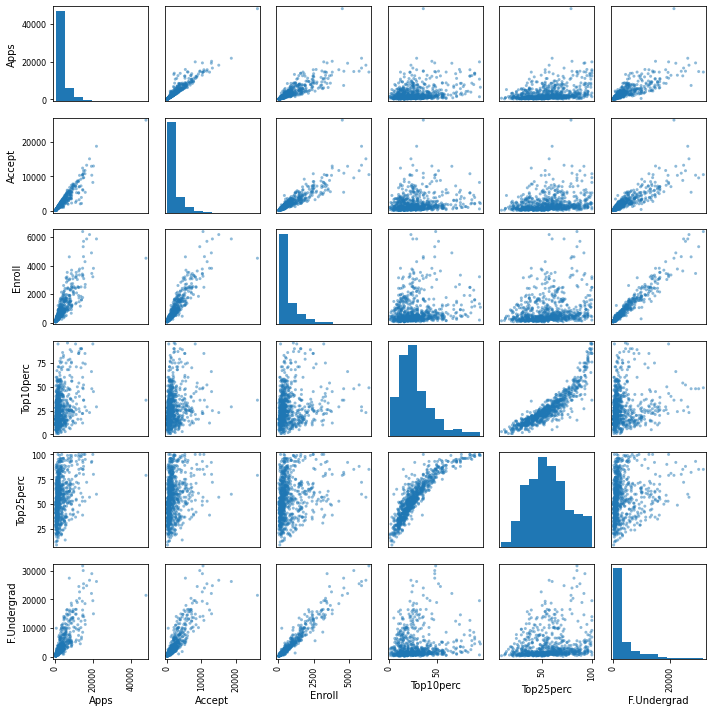

In [ ]:
scatter_matrix(college.loc[:,[x for x in df.columns if x in ('Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad')]],figsize = (10,10))

# call the function above these lines
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{iii)}$ Use seaborn's or matplotlib's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

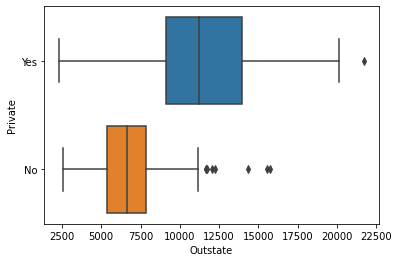

In [ ]:

seaborn.boxplot(x=college['Outstate'],y=college['Private']) 


$\mathbf{iv)}$  Create a new qualitative variable in the dataframe, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the number of students coming from the top 10% of their high school classes exceeds 50.

In [ ]:
def bin(row):
  if row['Top10perc'] > 50:
    return 1
  else:
    return 0

college['Elite'] = college.apply (lambda row: bin(row), axis=1)


#again figure out what is going rong with the rows and this should work

Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate on Elite.

78


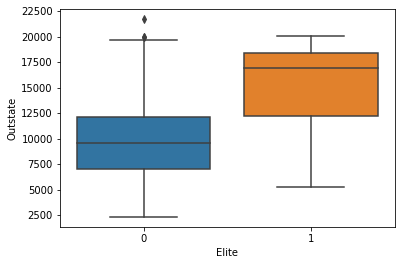

In [ ]:
print(college['Elite'].sum())
seaborn.boxplot(x=college['Elite'],y=college['Outstate']) 

$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a quantitative variable of your choice. You can make multiple cells or if you are familiar with python try making a grid of multiple plots to be displayed by one cell.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

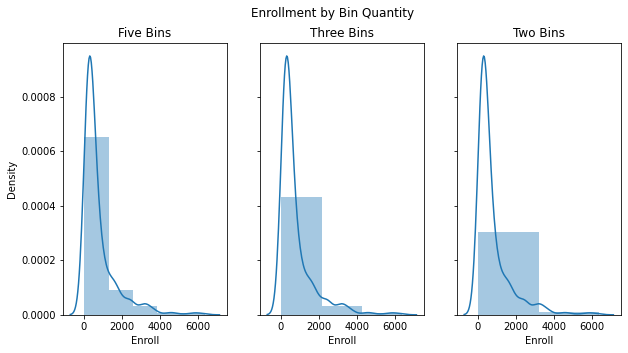

In [ ]:
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row')
fig.suptitle('Enrollment by Bin Quantity')
axes[0].set_title('Five Bins')
axes[1].set_title('Three Bins')
axes[2].set_title('Two Bins')
fig.set_figheight(5)
fig.set_figwidth(10)


seaborn.distplot(a=college['Enroll'], bins = 5, ax = axes[0])
seaborn.distplot(a=college['Enroll'], bins = 3, ax = axes[1])
seaborn.distplot(a=college['Enroll'], bins = 2, ax = axes[2])

You can create a grid of histograms with the hist method of the dataframe. Choose some variables that seem interesting and create hhistograms in this way.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9613b6c850>,
      dtype=object)

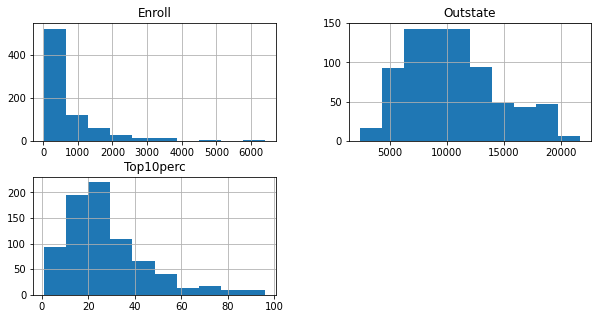

In [ ]:

df_subsection = college[['Enroll','Outstate','Top10perc']]
df_subsection.hist(figsize=(10,5))

Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.  
We are not looking for anything in particular just try to make something that shows something about the data ond its relationships in graphs or summary statistics that you haven't already created above.

In [ ]:
#print([x for x in college.columns])
subset = college[['PhD','Top10perc','Expend','Grad.Rate']]
subset.cov() # see how much expenditure, PhD, and other variables vary and covary with each other

,PhD,Top10perc,Expend,Grad.Rate
PhD,266.608636,153.184870,3.689806e+04,85.557109
Top10perc,153.184870,311.182456,6.087931e+04,149.992164
Expend,36898.058233,60879.310196,2.726687e+07,35012.968271
Grad.Rate,85.557109,149.992164,3.501297e+04,295.073717


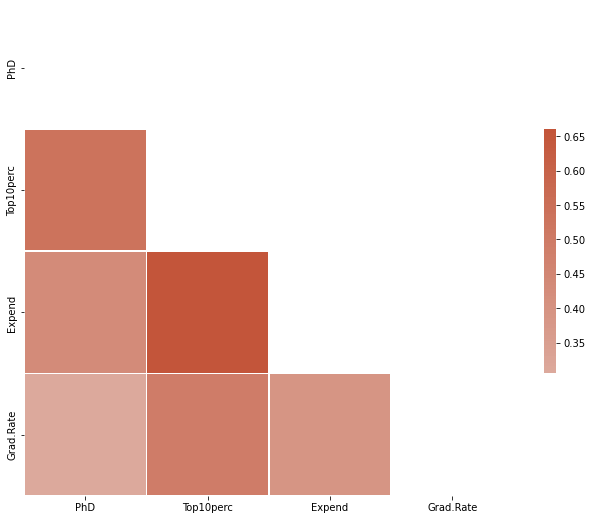

In [ ]:
# Compute the correlation matrix
import numpy as np
corr = subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Explain what you did and what it means here

I wanted to get a sense for the correlation between a few of the variables to investigate which relationships would be relevant in further analysis. In order to do this I created a variance-covariance matrix of a few variables and then made a heatmap of the correlations between those variables. This gave me a table and a visual way of understanding a little better the relationships between some important variables.

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

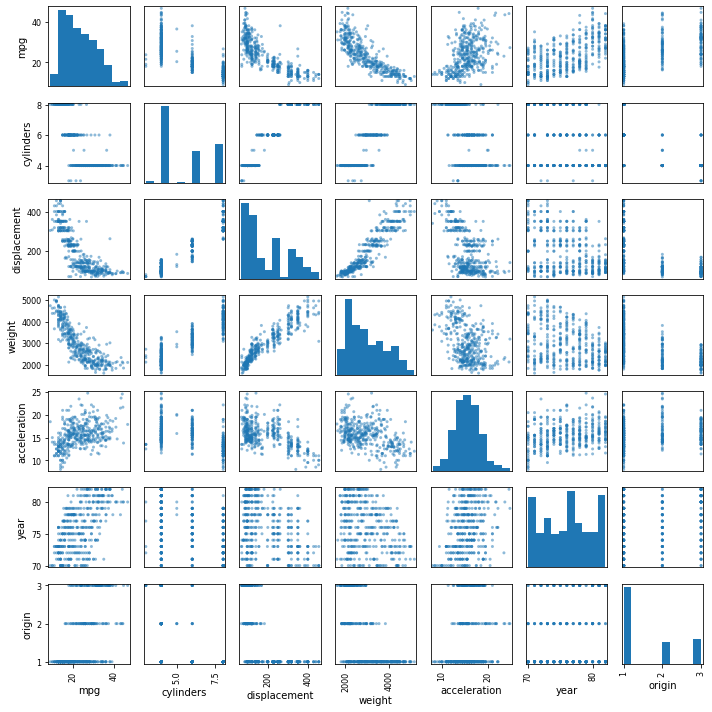

In [ ]:
auto = pd.read_csv('Auto.csv') 
scatter_matrix(auto,figsize = (10,10))

plt.tight_layout()
plt.show() 


$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

In [ ]:
auto.corr()


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature (a variable in the regression). Use the summary() method to print the results. 

In [ ]:
# fill in the variable names you plan on using in the regression
X = auto['year']
y = auto['mpg']

reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              4281.
Date:                Wed, 29 Sep 2021   Prob (F-statistic):                   2.07e-214
Time:                        16:46:49   Log-Likelihood:                         -1347.6
No. Observations:                 397   AIC:                                      2697.
Df Residuals:                     396   BIC:                                      2701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?

  There is a relationship between the predictors and the respnse variables. The F-statistic shows it is significant and the R-squared shows that 82% of the variation in mpg is explaines by the x's.

ii. Which predictors appear to have a statistically significant relationship to the response?  

Year, weight, displacement, and origin appear to have statistically significant relationships with the response.

iii. What does the coefficient for the year variable suggest?

The 0.7508 coefficient on year suggests that a year increase correlates to a .75 mpg increase for a car.



In [ ]:
auto = auto[auto['horsepower'] != "?"] #index with true false and then reindex to drop unknown horsepower
auto['horsepower'] = auto['horsepower'].astype("int32")
[x for x in auto.columns]

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [ ]:
model = smf.ols(formula="mpg ~  cylinders + displacement + horsepower + weight + acceleration + origin + year", data=auto).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):          2.04e-139
Time:                        16:46:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
origin           1.4261      0.278      5.127      0.000       0.879       1.973
year             0.7508      0.051     14.729      0.000       0.651       0.851
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

Observations 13 and 28 are troubling. Observation 13 has high leverage and the error is far away from the rest of the distribution. Observation 28 is a smaller problem but is still removed from the rest of the errors.

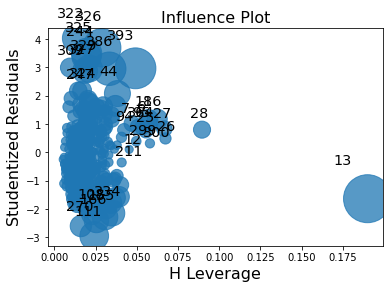

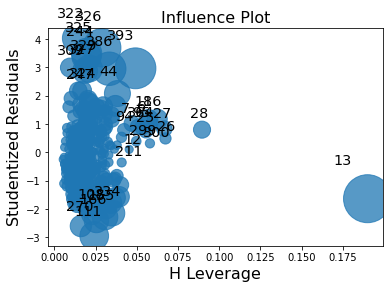

In [ ]:
sm.graphics.influence_plot(model)

$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
A relativley easy way to do this si the use scikit-learn's polynomial features but you can add in interaction and squared columns individually to the dataframe by multiplying columns together.


In [ ]:
model3 = smf.ols(formula="mpg ~  cylinders * horsepower + displacement + weight + I(weight**2) + acceleration + origin + year + cylinders:acceleration", data=auto).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     244.9
Date:                Wed, 29 Sep 2021   Prob (F-statistic):          4.05e-159
Time:                        16:46:50   Log-Likelihood:                -968.15
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.3311      7.648      0.828      0.408      -8.707      21.369
cylinders                 -2.0472      1.371     -1.493      0.136      -4.743       0.648
horsepower                -0.2088      0.049     -4.244      0.000      -0.306      -0.112
cylinders:horsepower       0.0248      0.007      3.573      0.000       0.011       0.038
displacement               0.0015      0.007      0.211      0.833      -0.012       0.015
weight                    -0.0115      0.003     -4.472      0.000      -0.017      -0.006
I(weight ** 2)          1.097e-06   3.61e-07      3.035      0.003    3.86e-07    1.81e-06
acceleration               0.1235      0.282      0.438      0.662      -0.431       0.678
origin                     0.7368      0.253      2.907      0.004       0.238       1.235
year                       0.7707      0.046     16.791      0.000       0.680       0.861
cylinders:acceleration    -0.0431      0.051     -0.848      0.397      -0.143       0.057
==============================================================================
Omnibus:                       47.025   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.092
Skew:                           0.670   Prob(JB):                     3.70e-21
Kurtosis:                       4.992   Cond. No.                     5.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demeaning the values or not so there shouldn't be a big difference in results from either method.

In [ ]:

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import mglearn
from sklearn.preprocessing import StandardScaler

SEED = 123

X, y = make_blobs(n_samples=1000, n_features=5000, cluster_std=90., random_state=SEED)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)



pca = PCA(n_components=2) #create PCA object
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled) #this gets the actual pca variables by multiplying eigenvectors by the x variables
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

print("PCA components:\n{}".format(pca.components_))

Original shape: (1000, 5000)
Reduced shape: (1000, 2)
PCA components:
[[-0.00325238  0.00123322 -0.00421415 ...  0.00574289 -0.00807827
  -0.00743334]
 [-0.00125044  0.02834632  0.01144285 ...  0.0165567  -0.00543477
  -0.01571781]]


Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays mroe nicely with seaborn.

          0         1  y
0 -1.403222  3.494413  2
1  5.241342  0.937978  1
2 -3.171788 -4.422872  0
3 -4.514174  9.427478  2
4  1.144077  1.300815  1


Text(0, 0.5, 'Second principal component')

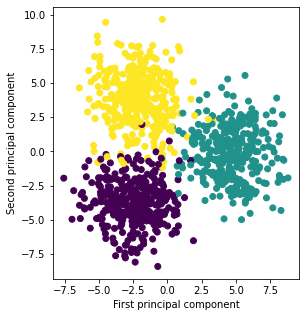

In [ ]:
pca_frame = pd.DataFrame(data=x_pca)
pca_frame['y'] = pd.Series(y)
print(pca_frame.head())

#plt.scatter(pca_frame[0],pca_frame[1])
#plt.plot(pca_frame[0],pca_frame['y'])
#plt.plot(pca_frame[1],pca_frame['y'])

plt.figure(figsize=(5, 5))
plt.scatter(pca_frame[0],pca_frame[1],c=pca_frame['y'])
#mglearn.discrete_scatter(pca_frame[:, 0], pca_frame[:, 1], pca_frame['y'])
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


## KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classifcation report function from skelarn to get some metrics that measure the quality of the model you used.

In [ ]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) #create clusters
y_hat = kmeans.labels_
print(classification_report(y_true = y,y_pred = y_hat))

              precision    recall  f1-score   support

           0       0.39      0.20      0.27       334
           1       0.36      0.28      0.31       333
           2       0.31      0.53      0.39       333

    accuracy                           0.34      1000
   macro avg       0.35      0.34      0.32      1000
weighted avg       0.35      0.34      0.32      1000



Perform K-means clustering with K = 2. Describe your results.

Accuracy is 27% for 2 and 3 clusters but the one with 2 clusters has higher precision.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X) #create clusters
y_hat = kmeans.labels_
print(classification_report(y_true = y,y_pred = y_hat))

              precision    recall  f1-score   support

           0       0.37      0.53      0.43       334
           1       0.26      0.40      0.31       333
           2       0.00      0.00      0.00       333

    accuracy                           0.31      1000
   macro avg       0.21      0.31      0.25      1000
weighted avg       0.21      0.31      0.25      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 4, and describe your results.

Accuracy dropped to 19% and prescision and recall are inconsistent where some are better and some are worse than the above models.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) #create clusters
y_hat = kmeans.labels_
print(classification_report(y_true = y,y_pred = y_hat))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38       334
           1       0.66      0.11      0.19       333
           2       0.36      0.23      0.28       333
           3       0.00      0.00      0.00         0

    accuracy                           0.25      1000
   macro avg       0.35      0.19      0.21      1000
weighted avg       0.46      0.25      0.29      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

Using the pca data for clustering improved the results dramatically. Accuracy jumped up to 98% which is about 60% higher than it was before.

In [ ]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca) #create clusters
y_hat = kmeans.labels_
print(classification_report(y_true = y,y_pred = y_hat))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       334
           1       0.01      0.01      0.01       333
           2       0.03      0.03      0.03       333

    accuracy                           0.02      1000
   macro avg       0.02      0.02      0.02      1000
weighted avg       0.02      0.02      0.02      1000



Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

These results are better than any of the other clustering techniques excpet for the one with pca. This makes sense because the variation is scaled for all variables in the model so they will match up better and prediction will improve.

In [ ]:

scaler = StandardScaler() #create scaler object
scaler.fit(X) #feed the scaler object the x
x_scaled = scaler.transform(X) #then actually standardize it

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled) #create clusters
y_hat = kmeans.labels_
print(classification_report(y_true = y,y_pred = y_hat))


              precision    recall  f1-score   support

           0       0.33      0.34      0.34       334
           1       0.24      0.27      0.25       333
           2       0.25      0.22      0.23       333

    accuracy                           0.28      1000
   macro avg       0.28      0.28      0.28      1000
weighted avg       0.28      0.28      0.28      1000



## Supervised Machine Learning
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. you should be able to use the same dataframe for the previous problem using the auto dataset here as well or you can load it in and start over if you want to practice

In [ ]:
#nah I'm good, no need to upload another csv lol

Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all. You will be asked to use models we have not deeply discussed in lecture but that will not change the coding aspect of it so you should be able to complete the assignment without knowing what exactly is happening. This is just meant to introduce you to how to use models from scikit-learn so don't worry if this is the case. This is one of the problems with the way a lot of people try to use machine learning so I do not recommend it in the future as predictions from a model you don't understand are probably not very good predictions no matter how good the scoring metrics do. 

In [ ]:
# this creates a variable named mpg01 that indicates whetehr or not gas mileage iss above the median of the sample
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()


Scikit-learn is set up so that if you know how to use one model you know how to use them all. Here is an example of the steps that you will follow in general for classification, like in the following question. A regression problem is with a continuous outcome and classification is with a discrete outcome.
```python
from sklearn.submoodule import Model # import a model from the appropriate submodule of scikit-learn
model_obj = Model() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
```

$(a)$ Create an X matrix and a Y vector. The variable you created called `mpg01` will be the y variable.  
Are there any variables that should not be included? Hint: I am aking this because there is a variable that should not be included.

In [ ]:
X=auto.drop(['mpg01','mpg','name'], axis=1)
y = auto['mpg01']

$(b)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01`. How accurate is the model?

It is 91% accurate.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda.score(X,y)

0.9107142857142857

$(c)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01`. How accurate is the model?

It is 91.6% accurate.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)
qda.score(X,y)


0.9158163265306123

$(d)$ Perform logistic regression on the training data in order to predict `mpg01`. How accurate is the model?

It is 90% accurate.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
lr.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9030612244897959

$(e)$ Perform K-nearest Neighbors on the training data in order to predict `mpg01`. How accurate is the model?  
Which value of K seems to perform the best on this data set?

K=3 seems to perform the best with an score of .97.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

kn2 = KNeighborsClassifier(2)
kn2.fit(X,y)
print(kn2.score(X,y))

kn3 = KNeighborsClassifier(3)
kn3.fit(X,y)
print(kn3.score(X,y))

kn5 = KNeighborsClassifier(5)
kn5.fit(X,y)
print(kn5.score(X,y))

0.9438775510204082
0.9209183673469388
0.923469387755102


In [ ]:
#You can ignore this code if you want. I just did this when I couldn't get the above code to run correctly.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

kn = KNeighborsClassifier(n_neighbors=3)
kn1 = KNeighborsClassifier(n_neighbors=1)
kn5 = KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

kn1.fit(X_train,y_train)
y_pred = kn1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

kn5.fit(X_train,y_train)
y_pred = kn5.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8813559322033898
Accuracy: 0.8813559322033898
Accuracy: 0.864406779661017


$(f)$ Now run a random forest classifier on the data. If you are feeling comfortable with this, you can try different parameters to try and tune the model to give better results. This is not necessary to receive full credit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X, y)
rfc.score(X,y)

0.946